<a href="https://colab.research.google.com/github/tejaswishetty17/Agentic-AI/blob/main/AutoQuery_Multi_Agent_NLP_to_SQL_Pipeline_with_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🧠 Project Overview: Multi-Agent Natural Language to SQL Generator**

This notebook demonstrates a `multi-agent system` designed to convert natural language queries into executable SQL commands using LangChain and LangGraph. The goal is to enable non-technical users to interact with a database simply by asking questions in plain English.

Key components of this study:

✅ `SQLite Setup:` A mock shop.db is created with users and orders tables, simulating a basic e-commerce schema.

🔧 `Schema Inspection & SQL Execution Tools:` Tools are defined to introspect the database schema and execute SQL queries dynamically.

🧩 `Multi-Agent Workflow:` Multiple specialized agents are orchestrated to:

- Understand user intent (natural language query)

- Generate appropriate SQL queries

- Validate and execute the queries

🤖 `Agent Collaboration via LangGraph:` The agents communicate through a defined graph to ensure query accuracy and proper error handling.

📘 `Follow the full implementation and query generation process here:`
https://smith.langchain.com/public/e80d9cf5-a08d-453c-b8cc-45db94b06287/r

This notebook is intended as a learning resource for those exploring how Large Language Models (LLMs) can be used to automate database querying through agentic AI.

In [1]:
pip install -q langchain_openai langgraph langchain streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 20.3 MB/s eta 0:00:00


In [2]:
import sqlite3

conn = sqlite3.connect("shop.db", check_same_thread=False)

In [3]:
# Create users table
conn.execute('''
CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT,
    signup_date DATE
)
''')

# Create orders table
conn.execute('''
CREATE TABLE IF NOT EXISTS orders (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    amount REAL,
    status TEXT,
    order_date DATE,
    FOREIGN KEY(user_id) REFERENCES users(id)
)
''')

# Insert users
conn.execute("INSERT INTO users VALUES (1, 'Alice', 'alice@example.com', '2024-01-10')")
conn.execute("INSERT INTO users VALUES (2, 'Bob', 'bob@example.com', '2024-03-15')")
conn.execute("INSERT INTO users VALUES (3, 'Charlie', 'charlie@example.com', '2024-03-22')")
conn.execute("INSERT INTO users VALUES (4, 'Diana', 'diana@example.com', '2024-04-05')")
conn.execute("INSERT INTO users VALUES (5, 'Eve', 'eve@example.com', '2024-04-25')")
conn.execute("INSERT INTO users VALUES (6, 'Frank', 'frank@example.com', '2024-05-15')")
conn.execute("INSERT INTO users VALUES (7, 'Grace', 'grace@example.com', '2024-05-18')")
conn.execute("INSERT INTO users VALUES (8, 'Henry', 'henry@example.com', '2024-05-20')")
conn.execute("INSERT INTO users VALUES (9, 'Ivy', 'ivy@example.com', '2024-06-01')")
conn.execute("INSERT INTO users VALUES (10, 'Jack', 'jack@example.com', '2024-06-05')")
conn.execute("INSERT INTO users VALUES (11, 'Kiran', 'kiran@example.com', '2024-06-03')")
conn.execute("INSERT INTO users VALUES (12, 'Lata', 'lata@example.com', '2024-06-04')")
conn.execute("INSERT INTO users VALUES (13, 'Manoj', 'manoj@example.com', '2024-06-06')")

conn.execute("INSERT INTO users VALUES (14, 'Nina', 'nina@example.com', '2024-06-10')")
conn.execute("INSERT INTO users VALUES (15, 'Omar', 'omar@example.com', '2024-01-05')")
conn.execute("INSERT INTO users VALUES (16, 'Priya', 'priya@example.com', '2024-06-12')")


# Insert orders
conn.execute("INSERT INTO orders VALUES (1, 1, 250.00, 'completed', '2024-03-10')")
conn.execute("INSERT INTO orders VALUES (2, 2, 100.00, 'pending', '2024-03-16')")
conn.execute("INSERT INTO orders VALUES (3, 3, 320.00, 'completed', '2024-03-24')")
conn.execute("INSERT INTO orders VALUES (4, 4, 180.00, 'completed', '2024-05-01')")
conn.execute("INSERT INTO orders VALUES (5, 5, 210.00, 'completed', '2024-05-02')")
conn.execute("INSERT INTO orders VALUES (6, 1, 180.00, 'completed', '2024-03-18')")
conn.execute("INSERT INTO orders VALUES (7, 2, 120.00, 'completed', '2024-03-20')")
conn.execute("INSERT INTO orders VALUES (8, 1, 300.00, 'completed', '2024-04-01')")
conn.execute("INSERT INTO orders VALUES (9, 3, 80.00, 'cancelled', '2024-04-10')")
conn.execute("INSERT INTO orders VALUES (10, 4, 250.00, 'pending', '2024-05-05')")
conn.execute("INSERT INTO orders VALUES (11, 6, 400.00, 'completed', '2024-05-20')")
conn.execute("INSERT INTO orders VALUES (12, 7, 320.00, 'completed', '2024-05-22')")
conn.execute("INSERT INTO orders VALUES (13, 8, 150.00, 'pending', '2024-05-25')")
conn.execute("INSERT INTO orders VALUES (14, 9, 220.00, 'completed', '2024-06-02')")
conn.execute("INSERT INTO orders VALUES (15, 10, 500.00, 'completed', '2024-06-06')")

conn.execute("INSERT INTO orders VALUES (16, 1, 270.00, 'completed', '2024-06-10')")
conn.execute("INSERT INTO orders VALUES (17, 15, 320.00, 'completed', '2024-06-14')")
conn.execute("INSERT INTO orders VALUES (18, 3, 250.00, 'completed', '2024-06-01')")
conn.execute("INSERT INTO orders VALUES (19, 10, 200.00, 'cancelled', '2024-06-10')")
conn.execute("INSERT INTO orders VALUES (20, 6, 180.00, 'completed', '2024-06-15')")
conn.execute("INSERT INTO orders VALUES (21, 11, 310.00, 'pending', '2024-06-16')")

In [4]:
conn.commit()

In [5]:
#Get the schema informations
for table in ["users", "orders"]:
  # PRAGMA command is specific to SQLite, and it returns metadata about the table's columns—such as the column name, data type, whether it can be NULL, default values, and if it's part of the primary key.
  rows = conn.execute(f"PRAGMA table_info({table})").fetchall()
  print(rows)

[(0, 'id', 'INTEGER', 0, None, 1), (1, 'name', 'TEXT', 0, None, 0), (2, 'email', 'TEXT', 0, None, 0), (3, 'signup_date', 'DATE', 0, None, 0)]
[(0, 'id', 'INTEGER', 0, None, 1), (1, 'user_id', 'INTEGER', 0, None, 0), (2, 'amount', 'REAL', 0, None, 0), (3, 'status', 'TEXT', 0, None, 0), (4, 'order_date', 'DATE', 0, None, 0)]


In [6]:
for r in rows:
  cols = ",".join([f"{r[1]} {r[2]}"])
  print(cols)

id INTEGER
user_id INTEGER
amount REAL
status TEXT
order_date DATE


In [7]:
from langchain.agents import tool

@tool
def get_schema() -> str:
  """Return table schema from the SQLite database"""
  schema = ""
  for table in ["users", "orders"]:
    rows = conn.execute(f"PRAGMA table_info({table})").fetchall()
    cols = ",".join([f"{r[1]} {r[2]}" for r in rows])
    schema += f"{table}({cols})\n"
  return schema.strip()

@tool
def execute_sql(query: str)-> str:
  """Execute SQL query on the database and return the result"""
  try:
    result = conn.execute(query).fetchall()
    return str(result)
  except Exception as e:
    return f"Error: {str(e)}"

In [8]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import AnyMessage, add_messages
from langgraph.prebuilt import ToolNode, create_react_agent
from langchain_openai import ChatOpenAI
from typing import Annotated, TypedDict
from langgraph.prebuilt import tools_condition
from langchain.schema import AIMessage, SystemMessage, HumanMessage
import os

#Add your OPENAI KEY
os.environ["OPENAI_API_KEY"] = ""
#get the Tavily api key from https://app.tavily.com/home
os.environ["TAVILY_API_KEY"] = ""
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_ENDPOINT"]="https://api.smith.langchain.com"
#Add your LANGCHAIN KEY
os.environ["LANGCHAIN_API_KEY"]=""
os.environ["LANGCHAIN_PROJECT"]="RAG_ADVANCED"

from langsmith import utils
utils.tracing_is_enabled()

True

In [9]:
llm = ChatOpenAI(model = "gpt-4o-mini", temperature=0)

In [10]:
#Analyst agent

analyst_llm = llm.bind_tools([get_schema])


analyst_system_message = [SystemMessage(content = """
You are a data analyst tasked with exploring the structure of the database.

Step 1: Use available tools to inspect the database schema and understand the relationships between tables, key columns, and data types.

Step 2: Based on your understanding, generate a list of **at least 10 insightful and relevant questions** in a single response. These questions should aim to uncover key business insights such as user behavior, growth trends, product performance, revenue breakdowns, and operational patterns.

Your questions will be passed to a data expert for querying, so make sure they are specific, high-impact, and cover multiple dimensions of analysis.
""")]


class AnalystState(TypedDict):
  messages:Annotated[list[AnyMessage], add_messages]

def analyst(state:AnalystState) -> AnalystState:
  response = analyst_llm.invoke(analyst_system_message + state["messages"])
  return {"messages":[response]}

analyst_graph = StateGraph(AnalystState)
analyst_graph.add_node("analyst", analyst)
analyst_graph.add_node("tools", ToolNode([get_schema]))


analyst_graph.add_edge(START, "analyst")
analyst_graph.add_conditional_edges("analyst", tools_condition)
analyst_graph.add_edge("tools", "analyst")

analyst_app = analyst_graph.compile()

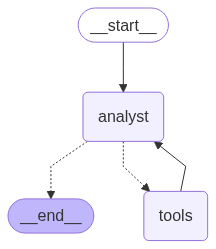

In [11]:
from IPython.display import Image, display
display(Image(analyst_app.get_graph().draw_mermaid_png()))

In [12]:
#Check the analyst agent
result = analyst_app.invoke({"messages":[HumanMessage("")]})
print(result["messages"][-1].content)

Based on the database schema, here are the tables and their relationships:

1. **Users Table**:
   - **Columns**: 
     - `id`: INTEGER (Primary Key)
     - `name`: TEXT
     - `email`: TEXT
     - `signup_date`: DATE

2. **Orders Table**:
   - **Columns**: 
     - `id`: INTEGER (Primary Key)
     - `user_id`: INTEGER (Foreign Key referencing Users)
     - `amount`: REAL
     - `status`: TEXT
     - `order_date`: DATE

### Insightful Questions

1. What is the average order amount per user, and how does it vary by user signup date?
2. How many users have made at least one order, and what percentage does this represent of the total user base?
3. What is the trend in the number of new users signing up over the past year?
4. What is the distribution of order statuses (e.g., completed, pending, canceled) across all orders?
5. Which month has the highest total order amount, and what factors might have contributed to this peak?
6. How does the average order amount differ between new users (si

In [13]:
#Expert agent

expert_llm = llm.bind_tools([execute_sql])

expert_system_message = [SystemMessage(content = """You are a data expert. Your task is to use tools to answer the analyst's questions with accurate and relevant data by directly querying the database.
Do not summarize or interpret the results—just focus on retrieving the correct data. A reviewer will handle the interpretation later.""")]

class ExpertState(TypedDict):
  messages:Annotated[list[AnyMessage], add_messages]

def expert(state:ExpertState) -> ExpertState:
  response = expert_llm.invoke(expert_system_message + state["messages"])
  return {"messages":[response]}

expert_graph = StateGraph(ExpertState)
expert_graph.add_node("expert", expert)
expert_graph.add_node("tools", ToolNode([execute_sql]))


expert_graph.add_edge(START, "expert")
expert_graph.add_conditional_edges("expert", tools_condition)
expert_graph.add_edge("tools", "expert")

expert_app = expert_graph.compile()

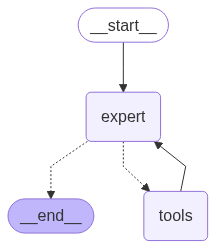

In [14]:
from IPython.display import Image, display
display(Image(expert_app.get_graph().draw_mermaid_png()))

In [15]:
#Check expert agent
expert_result = expert_app.invoke({"messages":[result["messages"][-1].content]})
print(expert_result["messages"][-1].content)

Here are the results for the insightful questions:

1. Average order amount per user by signup date:
   - (320.0, '2024-01-05')
   - (250.0, '2024-01-10')
   - (110.0, '2024-03-15')
   - (216.67, '2024-03-22')
   - (215.0, '2024-04-05')
   - (210.0, '2024-04-25')
   - (290.0, '2024-05-15')
   - (320.0, '2024-05-18')
   - (150.0, '2024-05-20')
   - (220.0, '2024-06-01')
   - (310.0, '2024-06-03')
   - (350.0, '2024-06-05')

2. Users who have made at least one order: 12 (75.0% of total users).

3. No data returned for the trend in new users signing up over the past year.

4. Distribution of order statuses:
   - Cancelled: 2
   - Completed: 15
   - Pending: 4

5. Month with the highest total order amount: June 2024, with a total of 2250.0.

6. Average order amount:
   - New users (last 30 days): 243.33
   - Long-term users: None.

7. Retention rate of users who made their first purchase within the first month of signing up: 12.

8. Orders placed by users who signed up in June 2024: 4 orde

In [16]:
pip install -q fpdf

  Preparing metadata (setup.py) ... done


In [48]:
from langchain.tools import tool

@tool
def generate_pdf_report(text: str, filename: str = "my_report.pdf") -> str:
    """
    Converts the provided text summary into a downloadable PDF report.
    Returns the file path.
    """
    from fpdf import FPDF
    import os

    try:
        pdf = FPDF()
        pdf.add_page()
        pdf.set_auto_page_break(auto=True, margin=15)
        pdf.set_font("Arial", size=12)

        for line in text.split("\n"):
            pdf.multi_cell(0, 10, line)

        # Save the file
        file_path = f"/content/sample_data/{filename}"
        pdf.output(file_path)
        return file_path
    except Exception as e:
        return f"PDF generation failed: {str(e)}"


In [72]:
#reviewer agent

reviewer_llm = llm.bind_tools([generate_pdf_report])

reviewer_system_message = [SystemMessage(content="""
You are a senior insights reviewer tasked with delivering a concise and strategic summary of a database analysis.

Produce a clear, high-impact report in **exactly eight lines**, formatted for inclusion in a professional PDF document intended for business leaders and stakeholders.

Your summary should distill the analysis into meaningful takeaways, focusing on:
- User base size, growth dynamics, and retention behavior
- Order volume, revenue patterns, and seasonal or category-level trends
- High-performing segments (users, regions, behaviors)
- Unusual patterns, inefficiencies, or data anomalies worth noting

Do not copy tables or lists. Instead, synthesize the insights to tell a compelling data story that informs decision-making.

Conclude with **two actionable, evidence-based recommendations** grounded in the observed trends. Use clear, polished language suitable for both technical and non-technical audiences.
""")]


class ReviewerState(TypedDict):
  messages: Annotated[list[AnyMessage], add_messages]

def reviewer(state: ReviewerState) -> ReviewerState:
  response = reviewer_llm.invoke(reviewer_system_message + state["messages"])
  return {"messages": [response]}


reviewer_graph = StateGraph(ReviewerState)
reviewer_graph.add_node("reviewer", reviewer)
reviewer_graph.add_node("tools", ToolNode([generate_pdf_report]))

reviewer_graph.add_edge(START, "reviewer")
reviewer_graph.add_conditional_edges("reviewer", tools_condition)
reviewer_graph.add_edge("tools","reviewer")

reviewer_app = reviewer_graph.compile()

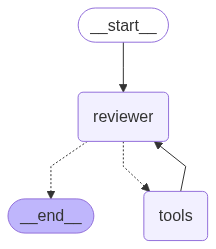

In [73]:
from IPython.display import Image, display
display(Image(reviewer_app.get_graph().draw_mermaid_png()))

In [74]:
#define the Superviser

from pydantic import BaseModel, Field
from typing import Literal

class AgentSelector(BaseModel):
  """Route to the available agent if needed, else route to END"""
  next_node: Literal["analyst", "expert", "reviewer", "END"] = Field(
      description = "Route to the available agent if needed, else route to END"
  )


agent_selector_llm =  llm.with_structured_output(AgentSelector)

supervisor_system_message = [SystemMessage(content="""
You are a supervisor agent responsible for orchestrating the workflow between three roles: [analyst, expert, and reviewer].

1. The **analyst** explores the database schema and asks insightful, relevant questions.
2. The **expert** uses SQL tools to answer the analyst’s questions by querying the database.
3. The **reviewer** summarizes the expert’s answers into a clear, concise, and professional report.

Instructions:
- At each step, set the 'next_node' to one of: 'analyst', 'expert', 'reviewer', or 'END'.
- Begin by routing to the analyst to initiate exploration.
- After enough questions are raised, route to the expert to generate answers.
- Then, route to the reviewer to create a summary of the findings.
- Finally, route to 'END' when all three roles have completed their tasks.

Important:
- You must route to each of the nodes **at least once**.
- Do **not** perform the tasks yourself. Your sole responsibility is to **coordinate** and **delegate** the next step to the appropriate agent.
""")]

In [75]:
class SupervisorState(TypedDict):
  messages:Annotated[list[AnyMessage], add_messages]
  next_node: Literal["analyst", "expert", "reviewer", "END"]

def supervisor(state:SupervisorState)-> SupervisorState:
  response = agent_selector_llm.invoke(supervisor_system_message + state["messages"])
  return {"messages":[AIMessage(content=f"Routing to: {response.next_node}")],
          "next_node":response.next_node
          }


def route_from_supervisor(state: SupervisorState)-> Literal["analyst", "expert", "reviewer", "__end__"]:
  """
  Route based on supervisor decision.
  It reads the next_node key from the supervisor state.
  """

  next_node = state.get("next_node")
  if next_node == "END":
    return "__end__"
  else:
    return next_node

In [83]:
graph = StateGraph(SupervisorState)
graph.add_node("supervisor", supervisor)
graph.add_node("analyst", analyst_app)
graph.add_node("expert", expert_app)
graph.add_node("reviewer", reviewer_app)

graph.add_edge(START, "supervisor")
graph.add_conditional_edges("supervisor", route_from_supervisor)
graph.add_edge("analyst", "supervisor")
graph.add_edge("expert", "supervisor")
graph.add_edge("reviewer", "supervisor")

final_app = graph.compile()

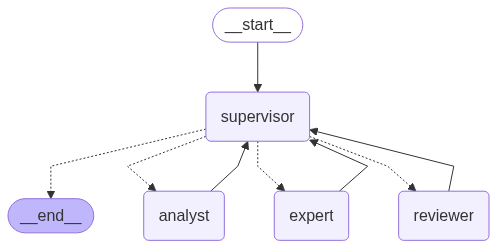

In [87]:
from IPython.display import Image, display
display(Image(final_app.get_graph().draw_mermaid_png()))

In [78]:
from langchain_core.messages import HumanMessage

inputs = {
    "messages":[
        HumanMessage(content="Generate a summary report based on table in my database.")
    ]
}

for output in final_app.stream(inputs):
  for key, value in output.items():
    print("=" * 50)
    print(f"📍 Node: {key}")
    print("-" * 50)
    for msg in value["messages"]:
      print(f"{msg.type.upper()}:{msg.content}\n")
    print("=" * 50)

📍 Node: supervisor
--------------------------------------------------
AI:Routing to: analyst

📍 Node: analyst
--------------------------------------------------
HUMAN:Generate a summary report based on table in my database.

AI:Routing to: analyst

AI:

TOOL:users(id INTEGER,name TEXT,email TEXT,signup_date DATE)
orders(id INTEGER,user_id INTEGER,amount REAL,status TEXT,order_date DATE)

AI:Based on the database schema, which includes two tables: `users` and `orders`, here are the insights and relevant questions that can be explored:

### Database Schema Summary
1. **Users Table**:
   - **Columns**: 
     - `id`: Unique identifier for each user (INTEGER)
     - `name`: Name of the user (TEXT)
     - `email`: Email address of the user (TEXT)
     - `signup_date`: Date when the user signed up (DATE)

2. **Orders Table**:
   - **Columns**: 
     - `id`: Unique identifier for each order (INTEGER)
     - `user_id`: Identifier linking to the user who made the order (INTEGER)
     - `amount`: